In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical

from keras.datasets import mnist

import numpy as np

from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.metrics import confusion_matrix

import pandas as pd
import seaborn as sns

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


Load the mnist training and test data sets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Display the first five images and the labels

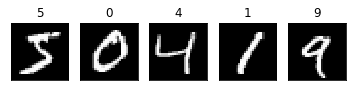

In [3]:
def plot_gray_image(img, title, ax):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img, cmap=cm.gray)
    ax.set_title(title)
    
fig, ax_list = plt.subplots(nrows=1, ncols=5)
for idx, ax in enumerate(ax_list):
    plot_gray_image(X_train[idx], y_train[idx], ax)

Flatten the two dimensional input data and center it around zero

In [10]:
img_size = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape(-1, img_size)
X_test_flat = X_test.reshape(-1, img_size)

X_train_flat = X_train_flat/255
X_test_flat = X_test_flat/255

In [11]:
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [16]:
batch_size = 128
epochs = 10

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(img_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train_flat, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_flat, y_test_cat))
score = model.evaluate(X_test_flat, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2498 - acc: 0.9229 - val_loss: 0.1218 - val_acc: 0.9610
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1029 - acc: 0.9689 - val_loss: 0.0932 - val_acc: 0.9713
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0759 - acc: 0.9771 - val_loss: 0.0796 - val_acc: 0.9748
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0608 - acc: 0.9813 - val_loss: 0.0708 - val_acc: 0.9808
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0492 - acc: 0.9848 - val_loss: 0.0754 - val_acc: 0.9798
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0434 - acc: 0.9868 - val_loss: 0.0857 - val_acc: 0.9792
Epoch 7/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0379 - acc: 0.9889 - val_loss: 0.0859 - val_acc

In [18]:
y_predict = model.predict_classes(X_test_flat)

Display numbers where the prediction is wrong

In [19]:
err_idx = np.where(y_test != y_predict)[0]

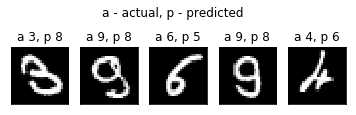

In [20]:
err_plot_size = 5
fig, ax_list = plt.subplots(nrows=1, ncols=err_plot_size)
fig.set_size_inches(w=6, h=2)
fig.suptitle('a - actual, p - predicted')
for idx, ax in enumerate(ax_list):
    data_idx = err_idx[idx]
    msg = 'a {}, p {}'.format(y_test[data_idx], y_predict[data_idx])
    plot_gray_image(X_test[data_idx], msg, ax)

In [21]:
cmatrix = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cmatrix)
df_cm

,0,1,2,3,4,5,6,7,8,9
0,971,0,2,1,1,1,4,0,0,0
1,0,1126,3,1,0,2,2,0,1,0
2,1,1,1014,4,2,0,0,3,7,0
3,0,0,3,995,0,2,0,2,7,1
4,2,1,1,0,967,0,4,2,1,4
5,2,0,0,5,0,876,3,0,3,3
6,2,2,0,1,4,6,941,0,2,0
7,1,1,9,2,0,0,0,1006,6,3
8,2,1,1,4,1,4,0,2,957,2
9,1,3,0,6,11,3,0,2,6,977


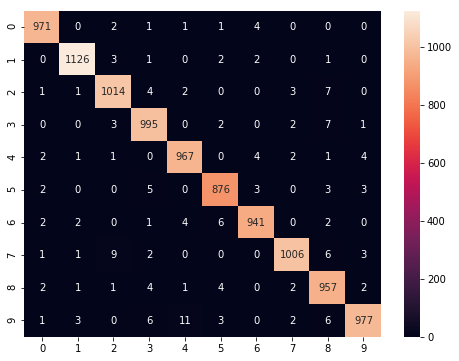

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='.0f', ax=ax)